In [734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from datetime import date
from datetime import datetime
import calendar
from sklearn import metrics

In [686]:
df = pd.read_csv('data/Interview.csv')

In [687]:
df.head(2)

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN


In [688]:
df.columns 

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

## Dropping unneccessary columns

In [689]:
df.drop(['Candidate Native location', \
         'Name(Cand ID)', \
         'Unnamed: 23', \
         'Unnamed: 24', \
         'Unnamed: 25', \
         'Unnamed: 26', \
         'Unnamed: 27'], \
        axis=1, \
        inplace=True)
df = df.drop(1233)

## Renaming columns

In [690]:
df.columns = ['date',
              'client',
              'industry',
              'location',
              'position',
              'skillset',
              'interview_type',
              'gender',
              'cand_cur_loc',
              'cand_job_loc',
              'interview_loc',
              'start_perm',
              'unsch_mtgs',
              'precall',
              'alt_num',
              'res_jd',
              'venue_clear',
              'letter_shared',
              'exp_attend',
              'obs_attend',
              'mar_status'] 

In [691]:
df.head()

,date,client,industry,location,position,skillset,interview_type,gender,cand_cur_loc,cand_job_loc,...,start_perm,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,obs_attend,mar_status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


## Cleaning Date 
credit to: https://www.kaggle.com/athoul01/predicting-interview-attendence

In [692]:
def clean_date(date):
    date = date.str.strip()
    date = date.str.split("&").str[0]
    date = date.str.replace('–', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace('Apr', '04')
    date = date.str.replace('-', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('//+', '/')
    return date

In [693]:
df['date'] = clean_date(df['date'])
df.head()

,date,client,industry,location,position,skillset,interview_type,gender,cand_cur_loc,cand_job_loc,...,start_perm,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,obs_attend,mar_status
0,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [694]:
# create fresh, new date column
df['date'] = clean_date(df['date'])

# change dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [695]:
# change datetimes to days of week

def make_weekdays_column():
    weekdays = []
    for i in range(0,len(df['date'])):
        weekdays.append(df['date'][i].weekday())
    weekdays = pd.Series(weekdays)
    df['weekdays'] = weekdays
#     print(df['weekdays'])

In [696]:
make_weekdays_column()
df

,date,client,industry,location,position,skillset,interview_type,gender,cand_cur_loc,cand_job_loc,...,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,obs_attend,mar_status,weekdays
0,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,4
1,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,4
2,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single,4
3,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,...,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single,4
4,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,...,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married,4
5,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Male,Gurgaon,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single,4
6,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Male,Gurgaon,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single,4
7,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Female,Gurgaon,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single,4
8,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Male,Gurgaon,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single,4
9,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Female,Gurgaon,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,4


## Columns to convert to 1s and 0s
'Gender'

'Have you obtained the necessary permission to start at the required time'

'Hope there will be no unscheduled meetings'

'Can I Call you three hours before the interview and follow up on your attendance for the interview'

'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'

'Have you taken a printout of your updated resume. Have you read the JD and understood the same'

'Are you clear with the venue details and the landmark.'

'Has the call letter been shared'

'Expected Attendance'

'Observed Attendance' 

'Marital Status'

In [697]:
def convert_yes_no_to_bool(df, col, str_to_match):
    series = pd.Series(np.where(df[col].values == str_to_match, 1, 0))
    df[col] = series
    return df

In [698]:
df = convert_yes_no_to_bool(df, 'obs_attend', 'Yes')
df = convert_yes_no_to_bool(df, 'start_perm', 'Yes')
df = convert_yes_no_to_bool(df, 'unsch_mtgs', 'Yes')
df = convert_yes_no_to_bool(df, 'precall', 'Yes')
df = convert_yes_no_to_bool(df, 'alt_num', 'Yes')
df = convert_yes_no_to_bool(df, 'res_jd', 'Yes')
df = convert_yes_no_to_bool(df, 'venue_clear', 'Yes')
df = convert_yes_no_to_bool(df, 'letter_shared', 'Yes')
df = convert_yes_no_to_bool(df, 'exp_attend', 'Yes')
# 1 for married 0 for single
df = convert_yes_no_to_bool(df, 'mar_status', 'Married')
# 1 for male 0 for female
df = convert_yes_no_to_bool(df, 'gender', 'Male')

In [699]:
df.head(10)

,date,client,industry,location,position,skillset,interview_type,gender,cand_cur_loc,cand_job_loc,...,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,obs_attend,mar_status,weekdays
0,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,1,Chennai,Hosur,...,1,1,1,1,1,1,1,0,0,4
1,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,1,Chennai,Bangalore,...,1,1,1,1,1,1,1,0,0,4
2,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,1,Chennai,Chennai,...,0,0,0,0,0,0,0,0,0,4
3,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,1,Chennai,Chennai,...,1,0,1,0,1,1,0,0,0,4
4,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,1,Chennai,Bangalore,...,1,1,0,1,1,1,0,0,1,4
5,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,1,Gurgaon,Gurgaon,...,1,1,1,1,1,1,1,1,0,4
6,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,1,Gurgaon,Gurgaon,...,1,1,1,1,1,1,1,1,0,4
7,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,0,Gurgaon,Gurgaon,...,1,1,1,1,1,1,1,1,0,4
8,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,1,Gurgaon,Gurgaon,...,1,1,1,1,1,1,1,1,0,4
9,2015-02-13,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,0,Gurgaon,Gurgaon,...,1,1,1,1,1,1,1,0,0,4


## Dropping columns to run models

In [700]:
df.drop(['date', \
         'client', \
         'industry', \
         'location', \
         'position', \
         'skillset', \
         'interview_type', \
         'cand_cur_loc', \
         'cand_job_loc', \
         'interview_loc'], \
        axis=1, \
        inplace=True)
df.head()

,gender,start_perm,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,obs_attend,mar_status,weekdays
0,1,1,1,1,1,1,1,1,1,0,0,4
1,1,1,1,1,1,1,1,1,1,0,0,4
2,1,0,0,0,0,0,0,0,0,0,0,4
3,1,1,1,0,1,0,1,1,0,0,0,4
4,1,1,1,1,0,1,1,1,0,0,1,4


## Creating train and test 

In [701]:
y = df.pop('obs_attend').values
X = df.values

In [702]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Creating and running Models

## Random Forest Classifier

In [703]:
rfs = RandomForestClassifier(n_estimators=100, random_state=5, oob_score=True)

In [704]:
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=5, verbose=0,
                       warm_start=False)

In [705]:
print("Training Acc:", round(rfs.score(X_train, y_train),5)),
print("Validation Acc:", round(rfs.score(X_test, y_test), 5))
print("Out-of-Bag Acc:", round(rfs.oob_score_, 5))
print("Score: {}".format(rfs.score(X_test, y_test)))

Training Acc: 0.70996
Validation Acc: 0.67961
Out-of-Bag Acc: 0.64827
Score: 0.6796116504854369


In [706]:
probs = rfs.predict_proba(X_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
roc_auc = metrics.roc_auc_score(y_test, probs)

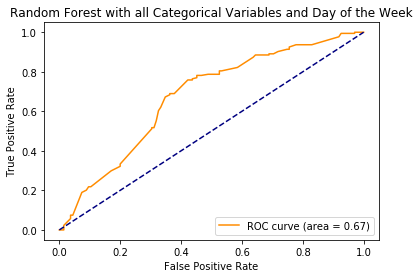

In [707]:
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with all Categorical Variables and Day of the Week')
plt.savefig('graphs/rf_cats_day.jpg')

In [722]:
rfs = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, oob_score=True, random_state=5)
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=5, verbose=0,
                       warm_start=False)

In [723]:
print("Training Acc:", round(rfs.score(X_train, y_train),5)),
print("Validation Acc:", round(rfs.score(X_test, y_test), 5))
print("Out-of-Bag Acc:", round(rfs.oob_score_, 5))
print("Score: {}".format(rfs.score(X_test, y_test)))

Training Acc: 0.68831
Validation Acc: 0.70227
Out-of-Bag Acc: 0.68074
Score: 0.7022653721682848


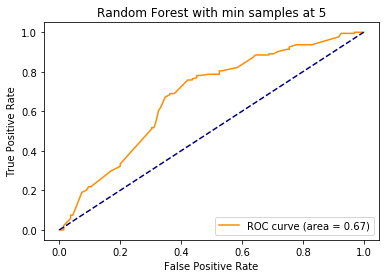

In [724]:
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with min samples at 5')
plt.savefig('graphs/rf_cats_day_minsam-.jpg')

In [733]:
rfs = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, oob_score=True, random_state=5)
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=5, verbose=0,
                       warm_start=False)

In [731]:
print("Training Acc:", round(rfs.score(X_train, y_train),5)),
print("Validation Acc:", round(rfs.score(X_test, y_test), 5))
print("Out-of-Bag Acc:", round(rfs.oob_score_, 5))
print("Score: {}".format(rfs.score(X_test, y_test)))

Training Acc: 0.68074
Validation Acc: 0.69579
Out-of-Bag Acc: 0.66991
Score: 0.6957928802588996


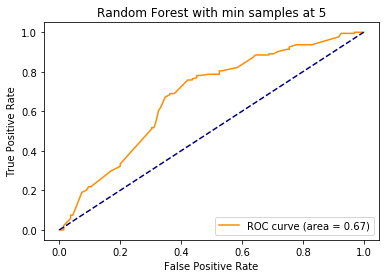

In [732]:
plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with min samples at 5')
plt.savefig('graphs/rf_cats_day_minsamp_entropy.jpg')

## K Nearest Neighbors

In [618]:
knn = KNeighborsClassifier(n_neighbors=8)

In [619]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [620]:
knn.score(X_test, y_test)

0.6472491909385113

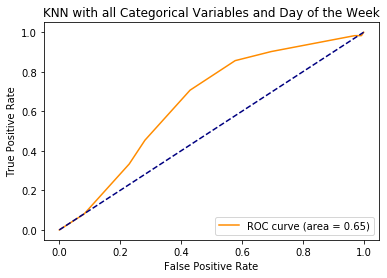

In [621]:
probs = knn.predict_proba(X_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
roc_auc = metrics.roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with all Categorical Variables and Day of the Week')
plt.savefig('graphs/knn_cats_day.jpg')

### Dropping all non categorical columns

In [622]:
df.drop(['weekdays'], axis=1, inplace=True)
df.head()

,gender,start_perm,unsch_mtgs,precall,alt_num,res_jd,venue_clear,letter_shared,exp_attend,mar_status
0,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,0
2,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,1,0,0
4,1,1,1,1,0,1,1,1,0,1


In [623]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Creating and fitting models

## Random Forest Classifier

In [624]:
rfs = RandomForestClassifier(n_estimators=100, random_state=5)

In [625]:
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [626]:
rfs.score(X_test, y_test)

0.6925566343042071

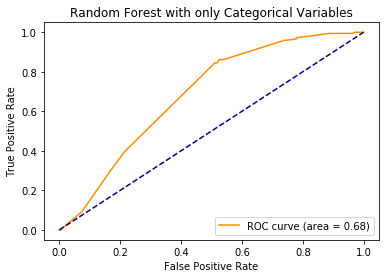

In [627]:
probs = rfs.predict_proba(X_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
roc_auc = metrics.roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with only Categorical Variables')
plt.savefig('graphs/rf_cats_only.jpg')

We are able to achieve a ~60% accuracy based purely off categorical data (1s and 0s)

## K Nearest Neighbors

In [628]:
knn = KNeighborsClassifier(n_neighbors=7)

In [629]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [630]:
knn.score(X_test, y_test)

0.6990291262135923

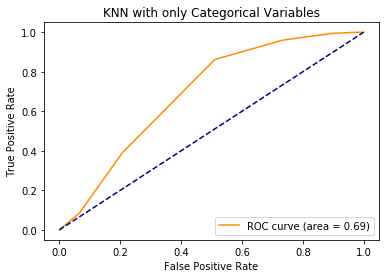

In [631]:
probs = knn.predict_proba(X_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
roc_auc = metrics.roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, color = 'darkorange',
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with only Categorical Variables')
plt.savefig('graphs/knn_cats_only.jpg')